In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import legendre, factorial,eval_legendre
from pandas import *
from scipy.optimize import fsolve
from scipy.special import hankel2
from sympy import init_printing, evalf, S,lambdify
from scipy.integrate import quad, odeint
from mpmath import findroot
init_printing()
from itertools import cycle
%matplotlib notebook

In [3]:
lines=["-","--","-.",":"]

In [4]:
line=cycle(lines)

In [5]:
m=40.
EI=20.
dd=0
#Kξ=24
#Kα=96
Kα,Kξ=sp.symbols('Kα,Kξ')
x=np.poly1d([1,0])
Sα=quad(m*(x-dd),-1, 1)[0]
Iα=quad(m*(x-dd)**2,-1, 1)[0]
#b=0.5

In [6]:
tol=1e-10
n = int(input(""))
n=n+1
nn=n
if n%2!=0:
    n=n+1
    nn=n-1
    

l=[legendre(i) for i in range(n)]
for k in range(n):
    for kk in range(n):
        if np.abs(l[k][kk])<tol:
            l[k][kk]=0
lp=l[2:n:2]
li=l[3:n:2]

t=[0 for i in range(n)]
t[0]=np.poly1d([1.])
t[1]=np.poly1d([1., 0.])
for i in range(2,n):
    t[i]=2*t[1]*t[i-1]-t[i-2]
tp=t[0:n:2]
ti=t[1:n:2]
x = sp.Symbol("x")
x1 = sp.Symbol("x1")
x2 = sp.Symbol("x2")
x3=  sp.Symbol("x3")
x4 = sp.Symbol("x4")
x5 = sp.Symbol("x5")
x6 = sp.Symbol("x6")
x7=  sp.Symbol("x7")
x8 = sp.Symbol("x8")
x9 = sp.Symbol("x9")
x10 = sp.Symbol("x10")
xx=[x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
xxp=[xx[i]*tp[i] for i in range(n//2)]
cpp = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    cp=sp.solve(np.sum(xxp[:i+2])-lp[i])
    cpp[i]=[cp[xx[j]] for j in range(i+2)]
#cpp=np.pad(cpp, (0, 2), 'constant')
xxi=[xx[i]*ti[i] for i in range(n//2)]
cii = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    ci=sp.solve(np.sum(xxi[:i+2])-li[i])
    cii[i]=[ci[xx[j]] for j in range(i+2)]
#cii=np.pad(cii, (0, 2), 'constant')
s = [[0 for x in range(n)] for y in range(n-2)] 
for j in range((n//2)-1):
    for i in range(2+j):
        s[2*j][2*i]=cpp[j][i]
        s[2*j+1][2*i+1]=cii[j][i]

s=np.transpose(s)
s= np.asarray(s, dtype=np.float)

Me = np.zeros((nn,nn),dtype=np.float)
Ce = np.zeros((nn,nn),dtype=np.float)
Ke = np.zeros((nn,nn),dtype=np.float)
Ge = np.zeros((nn,nn),dtype=np.float)
l=np.array([legendre(i+2) for i in range(n-2)]) 
l=l[:nn-1]
lT=l[:,np.newaxis]
el=np.array([eval_legendre(i+2,dd) for i in range(nn-2)])
#el=el[:nn-1]
elT=el[:,np.newaxis]
ld=np.array([np.polyder(legendre(i+2),2) for i in range(n-2)])
ld=ld[:nn-1]
ldT=ld[:,np.newaxis]

In = np.zeros((nn-2,nn-2))
Kn = np.zeros((nn-2,nn-2))
Kξη=np.zeros(nn-2,dtype=np.object)
H=np.zeros(nn-2)

mm=lT*m*l
mmm=ldT*EI*ld
κη=elT*Kξ*el 

for i in range(nn-2): 
    Kξη[i]=Kξ*el[i]
    H[i]=quad((l[i])*m, -1,1)[0]
    for j in range(nn-2):
        In[i,j]=quad(mm[i][j], -1, 1)[0]
        Kn[i,j]=quad(mmm[i][j],-1,1)[0]

        
        
        
for k in range(nn-2):
    for kk in range(nn-2):
            if np.abs(In[k,kk])<tol:
                In[k,kk]=0
            if np.abs(Kn[k,kk])<tol:
                Kn[k,kk]=0

if nn%2!=0:
    s=s[:nn,:nn-2]
n=nn
s

5


C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


array([[ 0.25     ,  0.       ,  0.140625 ,  0.       ],
       [ 0.       ,  0.375    ,  0.       ,  0.234375 ],
       [ 0.75     ,  0.       ,  0.3125   ,  0.       ],
       [ 0.       ,  0.625    ,  0.       ,  0.2734375],
       [ 0.       ,  0.       ,  0.546875 ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  0.4921875]])

In [7]:
for i in range (n):
    Ke[0,i] = i
    Ke[i,i] = -i/2

In [8]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ce[i,j]=-0.5
        if i==j-1:
            Ce[i,j]= 0.5
Ce[0,0]=1
Ce[0,1]=1

In [9]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ge[i,j]=-1/4
        if i==j-1:
            Ge[i,j]=1/4
Ge[0,1]=0.5
Ge[1,0]=0

In [10]:
Me[0,0]=0.5
Me[1,1]=1/16
Me[0,2]=Me[2,0]=-1/4
for i in range(2,n):
    Me[i,i]=i/(4*(i**2-1))
for i in range(2,n-1):
    Me[i-1,i+1]=Me[i+1,i-1]=-1/(8*i)

In [11]:
ρ=sp.Symbol('ρ')
b=sp.Symbol('b')
d=sp.Symbol('d')
U0=sp.Symbol('U0')
u0=sp.Symbol('u0')
η0=sp.Symbol('η0')
η1=sp.Symbol('η1')
η2=sp.Symbol('η2')
η3=sp.Symbol('η3')
η4=sp.Symbol('η4')
η5=sp.Symbol('η5')
η6=sp.Symbol('η6')
η7=sp.Symbol('η7')
η8=sp.Symbol('η8')
η9=sp.Symbol('η9')
η10=sp.Symbol('η10')
η11=sp.Symbol('η11')
η12=sp.Symbol('η12')
η13=sp.Symbol('η13')
η14=sp.Symbol('η14')
η=sp.Symbol('η')
η0p=sp.Symbol('η0p')
η1p=sp.Symbol('η1p')
η2p=sp.Symbol('η2p')
η3p=sp.Symbol('η3p')
η4p=sp.Symbol('η4p')
η5p=sp.Symbol('η5p')
η6p=sp.Symbol('η6p')
η7p=sp.Symbol('η7p')
η8p=sp.Symbol('η8p')
η9p=sp.Symbol('η9p')
η10p=sp.Symbol('η10p')
η11p=sp.Symbol('η11p')
η12p=sp.Symbol('η12p')
η13p=sp.Symbol('η13p')
η14p=sp.Symbol('η14p')
ηp=sp.Symbol('ηp')
η0s=sp.Symbol('η0s')
η1s=sp.Symbol('η1s')
η2s=sp.Symbol('η2s')
η3s=sp.Symbol('η3s')
η4s=sp.Symbol('η4s')
η5s=sp.Symbol('η5s')
η6s=sp.Symbol('η6s')
η7s=sp.Symbol('η7s')
η8s=sp.Symbol('η8s')
η9s=sp.Symbol('η9s')
η10s=sp.Symbol('η10s')
η11s=sp.Symbol('η11s')
η12s=sp.Symbol('η12s')
η13s=sp.Symbol('η13s')
η14s=sp.Symbol('η14s')
ηs=sp.Symbol('ηs')
α=sp.Symbol('α')
αp=sp.Symbol('αp')
αs=sp.Symbol('αs')
t=sp.Symbol('t')
ξ=sp.Symbol('ξ')
ξp=sp.Symbol('ξp')
ξs=sp.Symbol('ξs')
d=sp.Symbol('d')
v0=sp.Symbol('v0')
v1=sp.Symbol('v1')
v=sp.Symbol('v')
v0p=sp.Symbol('v0p')
v1p=sp.Symbol('v1p')
vp=sp.Symbol('vp')
λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9=sp.symbols('λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9')
λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p=sp.symbols('λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p')
η=[η0,η1,η2,η3,η4,η5,η6,η7,η8,η9,η10,η11,η12,η13,η14]
ηp=[η0p,η1p,η2p,η3p,η4p,η5p,η6p,η7p,η8p,η9p,η10p,η11p,η12p,η13p,η14p]
ηs=[η0s,η1s,η2s,η3s,η4s,η5s,η6s,η7s,η8s,η9s,η10s,η11s,η12s,η13s,η14s]
v0=U0*α+ξp-d*αp
v1=b*αp
v0p=U0*αp+ξs-d*αs
v1p=b*αs
v=[v0,v1]
v=np.pad(v, (0, n-2), 'constant')
vp=[v0p,v1p]
vp=np.pad(vp, (0, n-2), 'constant')
vp=vp[:,np.newaxis]
v=v[:,np.newaxis]
λ0v=[λ0]
λ0v=np.pad(λ0v, (0, n-1), 'constant')
λ0v=λ0v[:,np.newaxis]
λ=[λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9]
λp=[λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p]

In [12]:
a=np.zeros(n,dtype=np.object)
aa=np.zeros(n,dtype=np.object)
aaa=np.zeros(n,dtype=np.object)
aaaa=np.zeros(n,dtype=np.object)
for j in range(n):
    for i in range(2,n):
        a[j]+=s[j,i-2]*ηs[i]
        aa[j]+=s[j,i-2]*ηp[i]
        aaa[j]+=s[j,i-2]*η[i]
    a[j]+=vp[j]
    aa[j]+=v[j]-λ0v[j]
    aaaa[j]+=-U0*v[j]+U0*λ0v[j]
    
aA=b**2*np.dot(Me,a)
aaA=b*U0*np.dot(Ce,aa)
aaaA=U0**2*np.dot(Ke,aaa)
aaaaA=b*np.dot(Ge,aaaa)


In [13]:
L=np.zeros(n,dtype=np.object)
for i in range(n):    
    L[i]=(2*np.pi*ρ)*(-aA[i]-aaA[i]-aaaA[i]-aaaaA[i])
    #L[i][0]=(L[i][0]).subs([(b, 0.5),(d,0)])
M=-d*L[0]+b*L[1]
N=np.zeros_like(L)
N=np.dot(s.T,L)


In [14]:
M1m=np.zeros((n,n))
M2m=np.zeros_like(M1m,dtype=np.object)
Cm=np.zeros_like(M1m,dtype=np.object)
K1m=np.zeros_like(M1m)
K2m=np.zeros_like(M1m,dtype=np.object)

In [15]:
M2m[0,0]=sp.diff(L[0][0],ξs)
M2m[0,1]=sp.diff(L[0][0],αs)
M2m[1,0]=sp.diff(M[0],ξs)
M2m[1,1]=sp.diff(M[0],αs)
for i in range(n-2):
    M2m[0,i+2]=sp.diff(L[0][0],ηs[i+2])
    M2m[1,i+2]=sp.diff(M[0],ηs[i+2])
for j in range(n-2):
    for i in range(n-2):
        M2m[j+2,i+2]=sp.diff(N[j][0],ηs[i+2])

    M2m[j+2,0]=sp.diff(N[j][0],ξs)
    M2m[j+2,1]=sp.diff(N[j][0],αs)

In [16]:
IN=np.bmat([[np.zeros([len(In),2]),In]])
M1m=np.bmat([[np.zeros_like(IN[0])],[np.zeros_like(IN[0])],[IN]])
M1m[0,0]=m
M1m[1,0]=M1m[0,1]=Sα
M1m[1,1]=Iα

In [17]:
Mm=M1m-M2m

In [18]:
Cm[0,0]=sp.diff(L[0][0],ξp)
Cm[0,1]=sp.diff(L[0][0],αp)
Cm[1,0]=sp.diff(M[0],ξp)
Cm[1,1]=sp.diff(M[0],αp)
for i in range(n-2):
    Cm[0,i+2]=sp.diff(L[0][0],ηp[i+2])
    Cm[1,i+2]=sp.diff(M[0],ηp[i+2])
for j in range(n-2):
    for i in range(n-2):
        Cm[j+2,i+2]=sp.diff(N[j][0],ηp[i+2])

    Cm[j+2,0]=sp.diff(N[j][0],ξp)
    Cm[j+2,1]=sp.diff(N[j][0],αp)
Cm=-Cm

In [19]:
K2m[0,0]=sp.diff(L[0][0],ξ)
K2m[0,1]=sp.diff(L[0][0],α)
K2m[1,0]=sp.diff(M[0],ξ)
K2m[1,1]=sp.diff(M[0],α)
for i in range(n-2):
    K2m[0,i+2]=sp.diff(L[0][0],η[i+2])
    K2m[1,i+2]=sp.diff(M[0],η[i+2])
for j in range(n-2):
    for i in range(n-2):
        K2m[j+2,i+2]=sp.diff(N[j][0],η[i+2])

    K2m[j+2,0]=sp.diff(N[j][0],ξ)
    K2m[j+2,1]=sp.diff(N[j][0],α)

In [20]:
K1m=np.zeros_like(K2m,dtype=np.object)
K1m[0,0]=Kξ
K1m[1,1]=Kα
K1m[0,2:]=Kξη
K1m[2:,2:]=(Kn+κη)
K1m[2:,0]=Kξη

In [21]:
Km=K1m-K2m

In [22]:
I=np.eye(len(Cm))

In [23]:
def E1(n):
    D=np.zeros((n,n),dtype=np.float)
    dm=np.zeros(n)[:,np.newaxis]
    bm=np.zeros(n)
    c=np.array([2/(i+1) for i in range(n)])[:,np.newaxis]
    dm[0]=1/2

    for i in range(n):
        for j in range(n):
            if i==j+1:
                D[i,j]=(1/2)/(i+1)
            if i==j-1:
                D[i,j]=-(1/2)/(i+1)

    #bm=np.array([((-1)**(i-1))*((factorial(n+i)/factorial(n-i)))*(1/(factorial(i))**2) for i in range (1,n+1)])
    #bm[n-1]=bm[n-1]+(-1)**(n)
    #bm=np.array([1,-1,6,-5,-1,3],dtype=np.float)
    
    
    for i in range(1,n):
        bm[i-1]=(-1)**(i+1)*factorial(n+i-1)/(factorial(n-i-1)*factorial(i)**2)
    bm[n-1]=(-1)**(n+1)
    
    #for i in range(1,n+1):
        #bm[i-1]=(-1)**(i-1)*factorial(n)/(factorial(i)*factorial(n-i))
    
    dTm=np.transpose(dm)


    E=(D+dm*bm+c*dTm+0.5*c*bm)
    
    return E,bm,D,dm,c

In [24]:
g=9.81
α0=(2*np.pi)/180
F0=np.zeros(len(Km),dtype=np.object)
F0[0]=m*g
F0[1]=Sα*g+Kα*α0
F0[2:]=H*g

In [25]:
F1=-U0/b*I

In [26]:
c=np.array([2/(i+1) for i in range(n)])
F3=np.zeros_like(F1)
F3[:,1]=c*U0

In [27]:
F2=np.zeros_like(F1)
F2[:,0]=c
F2[:,1]=(0.5*b-d)*c

In [28]:
Dm=np.zeros_like(Km)
for j in range(n-2):
    for i in range(n):
        Dm[0,i]=sp.diff(L[0][0],λ[i])
        Dm[1,i]=sp.diff(M[0],λ[i])
        Dm[j+2,i]=sp.diff(N[j][0],λ[i])
    

In [29]:
A1=np.zeros((3*len(I),3*len(I)),dtype=np.object)
A2=np.zeros((3*len(I),3*len(I)),dtype=np.object)

In [30]:
ll=len(I)
A1[0:ll,0:ll]=I
A1[ll:(2*ll),ll:(2*ll)]=Mm
A1[2*ll:,2*ll:]=E1(n)[0]
A1[2*ll:,ll:(2*ll)]=F2

In [31]:
ll=len(I)
A2[0:ll,ll:2*ll]=I
A2[ll:(2*ll),ll:(2*ll)]=-Cm
A2[ll:(2*ll),0:ll]=-Km
A2[2*ll:,2*ll:]=F1
A2[2*ll:,ll:(2*ll)]=F3
A2[ll:2*ll,2*ll:]=Dm

In [32]:
-2*Ce@s

array([[-0.5      , -0.75     , -0.28125  , -0.46875  ],
       [-0.5      ,  0.       , -0.171875 ,  0.       ],
       [ 0.       , -0.25     ,  0.       , -0.0390625],
       [ 0.75     ,  0.       , -0.234375 ,  0.       ],
       [ 0.       ,  0.625    ,  0.       , -0.21875  ],
       [ 0.       ,  0.       ,  0.546875 ,  0.       ]])

In [33]:
-2*Ke@s

array([[-3.       , -4.5      , -5.625    , -7.03125  ],
       [ 0.       ,  0.375    ,  0.       ,  0.234375 ],
       [ 1.5      ,  0.       ,  0.625    ,  0.       ],
       [ 0.       ,  1.875    ,  0.       ,  0.8203125],
       [ 0.       ,  0.       ,  2.1875   ,  0.       ],
       [ 0.       ,  0.       ,  0.       ,  2.4609375]])

In [34]:
(2*np.pi/180)

In [35]:
m=40
g=9.81
α0=(2*np.pi/180)
EI=20

In [36]:
r2=np.linspace(1.5,15,100)
r3=np.linspace(0,0.7,100)

In [37]:
def estatico(r1,r2,r3,K1m,K2m,Kn,κη,n):
    matrix=np.zeros((6,6))
    K2mm=np.zeros((6,6))
    vectorsol=np.zeros(6)
    vectorsol[0]=0
    vectorsol[1]=r1*α0
    vectorsol[2:]=0
    for j in range(6):
        for i in range(6):
            K2mm[j,i]=K2m[j,i].subs([(d,0),(b,1)])/(np.pi*0.5*ρ*U0**2)
    K2mm=np.asarray(K2mm,dtype=np.float)
    matrix=-K2mm*np.pi*r3 
    matrix[2:,2:]+=r2*Kn/(EI*18)#*pow(2,3)
    #matrix[2,2]+=r2*Kn/(EI*18)
    #matrix[3,3]+=r2*Kn/(EI)
    matrix[0,0]=1
    matrix[1,1]=r1-(np.pi/2)*r3 
    matrix[0,2:]+=np.array(K1m[0,2:]/Kξ,dtype=np.float)
    matrix[2:,0]+=np.array(K1m[0,2:]/Kξ,dtype=np.float)
    matrix[2:,2:]+=np.array(κη/Kξ,dtype=np.float)
    matrix[1,2:]=matrix[1,2:]/4
    x=la.solve(matrix[:n,:n],vectorsol[:n])
    return x#,matrix[:n,:n]

In [40]:
estatico(1,15,r3[0],K1m,K2m,Kn,κη,2)[:]*(180/np.pi)

array([ 0.,  2.])

<IPython.core.display.Javascript object>


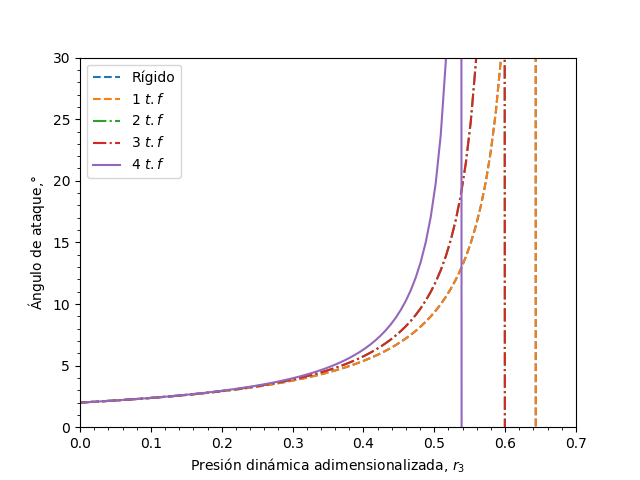

In [56]:
plt.figure()
plot=np.zeros((5,len(r3)))
#plot=np.zeros_like(r3)
for j in range(5):
    for i in range(100):
        plot[j,i]=estatico(1,1.5,r3[i],K1m,K2m,Kn,κη,2+j)[1]*(180/np.pi)
        #plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,6)[j+2]
plt.plot(r3,plot[0],label='Rígido',linestyle='--')
#for j in range(1,5):
    #plt.plot(r3,plot[j],label=r'$%d$ $t.f$'%j)
plt.plot(r3,plot[1],label=r'$%d$ $t.f$'%1,linestyle='--')
plt.plot(r3,plot[2],label=r'$%d$ $t.f$'%2,linestyle='-.')
plt.plot(r3,plot[3],label=r'$%d$ $t.f$'%3,linestyle='-.')
plt.plot(r3,plot[4],label=r'$%d$ $t.f$'%4,linestyle='-')



plt.legend(loc='upper left')
plt.ylim(0,30)
plt.xlim(0,0.7)
plt.xlabel('Presión dinámica adimensionalizada,' r' $r_%d$'%3)
plt.ylabel('Ángulo de ataque,'r'$\degree$')
plt.minorticks_on()
plt.savefig('aoa1',dpi=300)

<IPython.core.display.Javascript object>


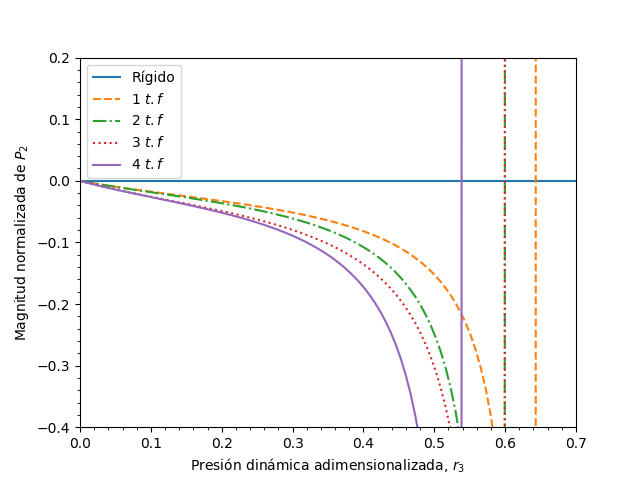

In [59]:
plt.figure()
plot=np.zeros((6,len(r3)))
#plot=np.zeros_like(r3)
plt.plot(r3,np.zeros(len(r3)),label='Rígido')
for j in range(4):
    for i in range(100):
        plot[j,i]=estatico(1,1.5,r3[i],K1m,K2m,Kn,κη,3+j)[2]#*(180/np.pi)
        #plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,6)[j+2]
for j in range(4):
    plt.plot(r3,plot[j],label=r'$%d$ $t.f$'%(j+1),linestyle=next(line))
    
plt.legend(loc='upper left')
plt.minorticks_on()
plt.ylim(-0.4,0.2)
plt.xlim(0,0.7)
plt.ylabel('Magnitud normalizada de'' $P_%d$'%2)
plt.xlabel('Presión dinámica adimensionalizada,' r' $r_%d$'%3)
plt.minorticks_on()
plt.savefig('eta21',dpi=300)

In [67]:
plott=plot[3]

<IPython.core.display.Javascript object>


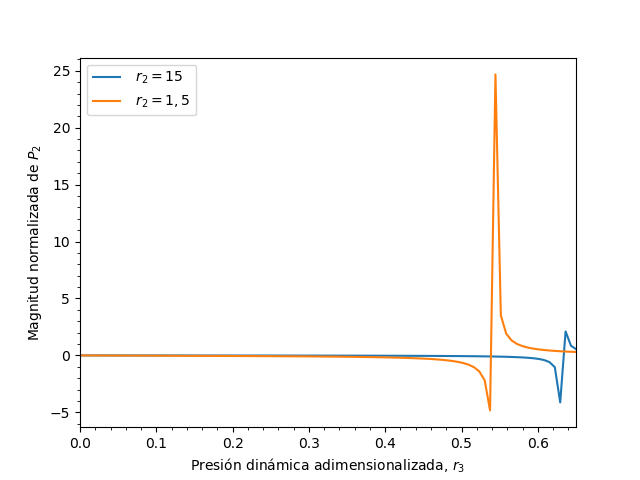

In [74]:
plt.figure()
plt.plot(r3,plott,label=r' $r_%d=15$'%2)
plt.plot(r3,plot[3],label=r' $r_%d=1,5$'%2)
plt.ylabel('Magnitud normalizada de'' $P_%d$'%2)
plt.xlabel('Presión dinámica adimensionalizada,' r' $r_%d$'%3)
plt.minorticks_on()
plt.legend(loc='upper left')
plt.xlim(0,0.65)
plt.savefig('divergencia',dpi=300)


<IPython.core.display.Javascript object>


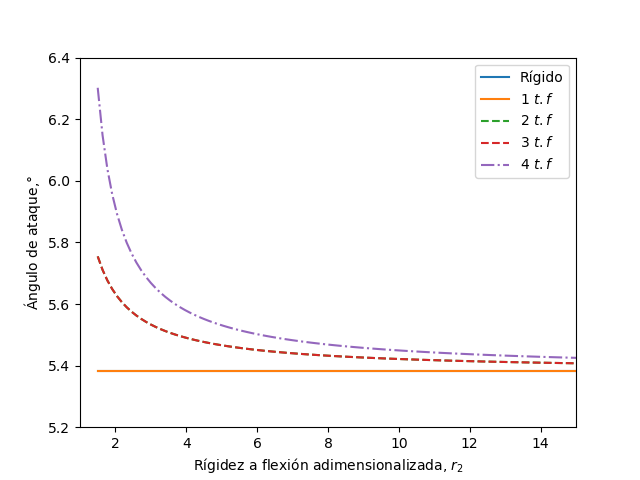

In [86]:
plt.figure()
plot=np.zeros((5,len(r3)))
α_plot=plot
#plot=np.zeros_like(r3)
for j in range(5):
    for i in range(100):
        plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,2+j)[1]*(180/np.pi)
        α_plot[j,i]=plot[j,i]
        #plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,6)[j+2]
plt.plot(r2,plot[0],label='Rígido')
#for j in range(1,5):
    #plt.plot(r2,plot[j],label=r'$%d$ $t.f$'%(j))
plt.plot(r2,plot[1],label=r'$%d$ $t.f$'%(1),linestyle='-')
plt.plot(r2,plot[2],label=r'$%d$ $t.f$'%(2),linestyle='--')
plt.plot(r2,plot[3],label=r'$%d$ $t.f$'%(3),linestyle='--')
plt.plot(r2,plot[4],label=r'$%d$ $t.f$'%(4),linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel('Ángulo de ataque,'r'$\degree$')
plt.ylim(5.2,6.4)
plt.xlim(1,15)
plt.savefig('aoar2',dpi=300)

In [85]:
plottt=plot

In [70]:
plot[3]

array([ 5.75461185,  5.71101801,  5.67653336,  5.64857285,  5.62544503,
        5.60599665,  5.58941435,  5.57510806,  5.56263927,  5.55167534,
        5.54195934,  5.53328968,  5.52550597,  5.51847901,  5.51210356,
        5.50629303,  5.50097551,  5.49609081,  5.49158815,  5.48742441,
        5.48356269,  5.4799713 ,  5.47662281,  5.47349337,  5.47056218,
        5.46781098,  5.46522368,  5.46278605,  5.46048548,  5.45831073,
        5.45625174,  5.45429951,  5.45244595,  5.45068377,  5.44900636,
        5.44740776,  5.44588253,  5.44442575,  5.4430329 ,  5.44169986,
        5.44042287,  5.43919846,  5.43802346,  5.43689492,  5.43581014,
        5.43476664,  5.43376209,  5.43279436,  5.43186145,  5.43096153,
        5.43009287,  5.42925387,  5.42844304,  5.42765899,  5.4269004 ,
        5.42616606,  5.42545482,  5.42476561,  5.42409742,  5.42344931,
        5.42282038,  5.42220979,  5.42161676,  5.42104053,  5.42048041,
        5.41993572,  5.41940584,  5.41889017,  5.41838814,  5.41

<IPython.core.display.Javascript object>


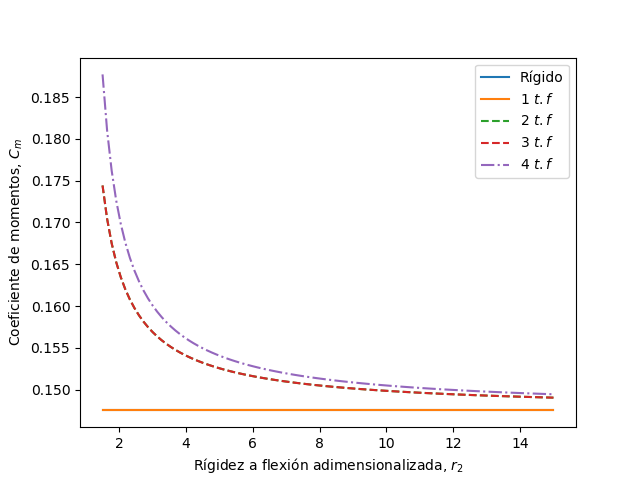

In [87]:
plt.figure()
plt.plot(r2,plot[0]*0.5*np.pi*np.pi/180,label='Rígido',linestyle='-')
plt.plot(r2,plot[0]*0.5*np.pi*np.pi/180,label=r'$%d$ $t.f$'%(1),linestyle='-')
plt.plot(r2,plot[2]*0.5*np.pi*np.pi/180+np.pi*3/16*plottt[1],label=r'$%d$ $t.f$'%(2),linestyle='--')
plt.plot(r2,plot[2]*0.5*np.pi*np.pi/180+np.pi*3/16*plottt[1],label=r'$%d$ $t.f$'%(3),linestyle='--')
plt.plot(r2,plot[4]*0.5*np.pi*np.pi/180+np.pi*3/16*plottt[1]+np.pi*15*plottt[3]/128,label=r'$%d$ $t.f$'%(4),linestyle='-.')
plt.legend(loc='upper right')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel('Coeficiente de momentos,'r' $C_m$')
#plt.xlim(1,15)
#plt.ylim(0.14,0.19)
plt.savefig('comr2',dpi=300)

<IPython.core.display.Javascript object>


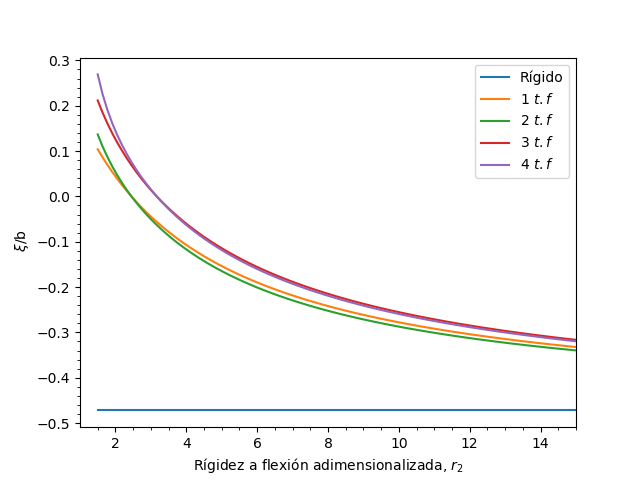

In [38]:
plt.figure()
plot=np.zeros((5,len(r3)))
ξ_plot=plot
#plot=np.zeros_like(r3)
for j in range(5):
    for i in range(100):
        plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,2+j)[0]#*(180/np.pi)
        ξ_plot[j,i]=plot[j,i]
        #plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,6)[j+2]
plt.plot(r2,plot[0],label='Rígido')
for j in range(1,5):
    plt.plot(r2,plot[j],label=r'$%d$ $t.f$'%(j))
plt.legend(loc='upper right')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel(r' $\xi$/b')
plt.minorticks_on()
#plt.ylim(-0.4,0.3)
plt.xlim(1,15)

<IPython.core.display.Javascript object>


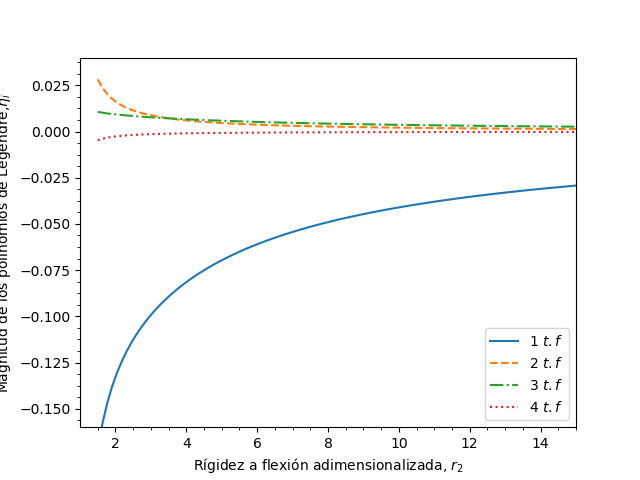

In [110]:
plt.figure()
plot=np.zeros((4,len(r3)))
η_plot=plot
#plot=np.zeros_like(r3)
for j in range(4):
    for i in range(100):
        #plot[j,i]=estatico(1,15,r3[i],K1m,K2m,Kn,κη,j+3)[2]#*(180/np.pi)
        plot[j,i]=estatico(1,r2[i],0.4,K1m,K2m,Kn,κη,6)[j+2]
        η_plot[j,i]=plot[j,i]
    plt.plot(r2,plot[j],label=r'$%d$ $t.f$'%(j+1),linestyle=next(line))
plt.legend(loc='lower right')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel('Magnitud de los polinomios de Legendre,' r'$ \eta_i$')
plt.minorticks_on()
plt.ylim(-0.16,0.04)
plt.xlim(1,15)

In [93]:
def fα0(η_plot,n):
    η_plott=np.copy(η_plot)
    i=3
    n=n-1
    while i>n:
        η_plott[i:,:]=0
        i=i-1
    α0=3/2*η_plott[0,:]+9/4*η_plott[1,:]+45/16*η_plott[2,:]+225/64*η_plott[3,:]
    return α0
    

<IPython.core.display.Javascript object>


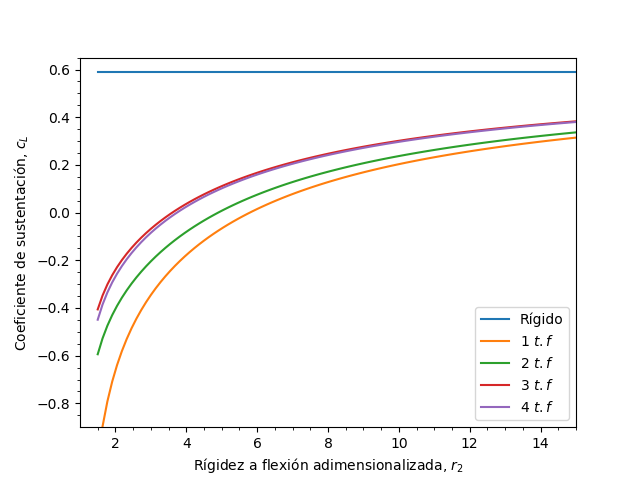

In [94]:
plt.figure()
plt.plot(r2,2*np.pi*(α_plot[0]*np.pi/180),label='Rígido')
plt.plot(r2,2*np.pi*(α_plot[1]*np.pi/180+3/2*η_plot[0]),label=r'$%d$ $t.f$'%(1))
plt.plot(r2,2*np.pi*(α_plot[2]*np.pi/180+3/2*η_plot[0]+9/4*η_plot[1]),label=r'$%d$ $t.f$'%(2))
plt.plot(r2,2*np.pi*(α_plot[3]*np.pi/180+3/2*η_plot[0]+9/4*η_plot[1]+45/16*η_plot[2]),label=r'$%d$ $t.f$'%(3))
plt.plot(r2,2*np.pi*(α_plot[4]*np.pi/180+3/2*η_plot[0]+9/4*η_plot[1]+45/16*η_plot[2]+225/64*η_plot[3]),label=r'$%d$ $t.f$'%(4))
plt.legend(loc='lower right')
plt.xlabel('Rígidez a flexión adimensionalizada,' r' $r_%d$'%2)
plt.ylabel('Coeficiente de sustentación,'r' $c_L$')
plt.minorticks_on()
plt.ylim(-0.9,0.65)
plt.xlim(1,15)

<IPython.core.display.Javascript object>


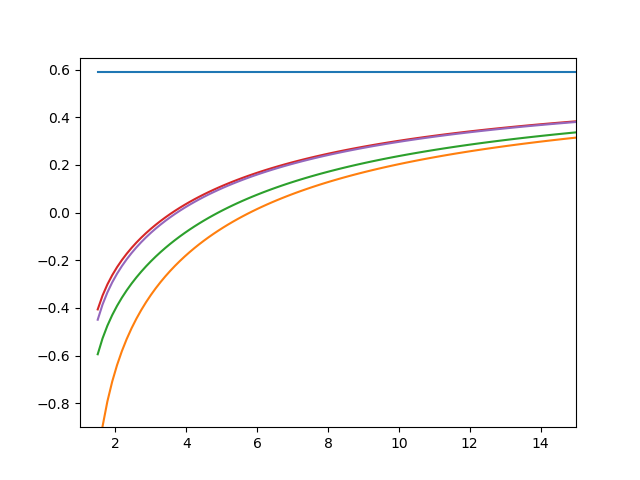

In [125]:
plt.figure()
for i in range(5):
    plt.plot(r2,2*np.pi*(α_plot[i,:]*(np.pi/180)+fα0(η_plot,i)))
plt.xlim(1,15)
plt.ylim(-0.9,0.65)

In [126]:
estatico(1,1.5,0.4,K1m,K2m,Kn,κη,6)

array([ 0.26918641,  0.1099909 , -0.17241045,  0.02828022,  0.0106422 ,
       -0.0046745 ])

In [127]:
L[0]

array([ 6.28318530717959*ρ*(-U0**2*(1.5*η2 + 2.25*η3 + 2.8125*η4 + 3.515625*η5) + 0.5*U0*b**2*αp - U0*b*(1.0*U0*α + 1.0*b*αp - 1.0*d*αp + 0.25*η2p + 0.375*η3p + 0.140625*η4p + 0.234375*η5p - 1.0*λ0 + 1.0*ξp) - b**2*(0.5*U0*αp - 0.5*d*αs - 0.0625*η2s - 0.0078125*η4s + 0.5*ξs))], dtype=object)

In [128]:
def pol(r2):
    pol=l[0]*estatico(1,r2,0.4,K1m,K2m,Kn,κη,6)[2]+l[1]*estatico(1,r2,0.4,K1m,K2m,Kn,κη,6)[3]+l[2]*estatico(1,r2,0.4,K1m,K2m,Kn,κη,6)[4]+l[3]*estatico(1,r2,0.4,K1m,K2m,Kn,κη,6)[5]
    return pol

<IPython.core.display.Javascript object>


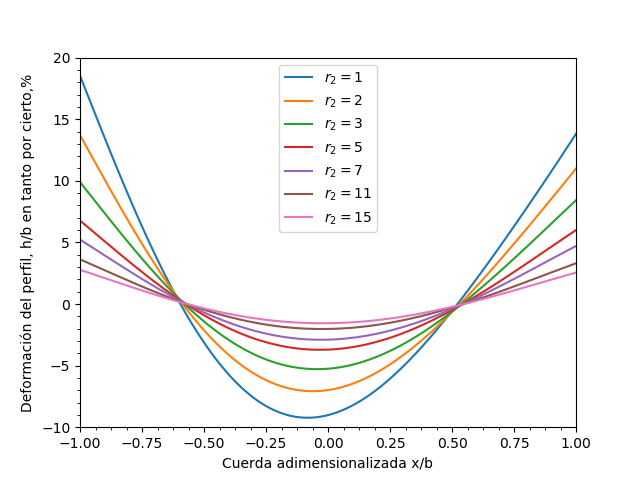

In [129]:
xb=np.linspace(-1,1,100)
r22=[1.5,2,3,5,7,11,15]
plt.figure()
for i in range(7):
    plt.plot(xb,-pol(r22[i])(xb)*100,label=r'$r_2=%d$'%r22[i])
plt.legend(loc='upper center')
plt.xlabel('Cuerda adimensionalizada x/b')
plt.ylabel('Deformación del perfil, h/b en tanto por cierto,%')
plt.minorticks_on()
plt.xlim(-1,1)
plt.ylim(-10,20)
plt.savefig('defor',dpi=300)